#Assignment 2-Exploratory Data Analysis
>By Rupesh Patel

This notebook is an assignment of CST2105_300 DataScience Foundation of BISI.

##Introduction

The dataset contains information about apps avaliable on google play store.


## Setting up Libraries

In [256]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot') # I love "ggplot" style, which is from the R-language package library.
import seaborn as sns


## Loading the data

In [257]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore (3).csv


In [258]:
import io
data = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))

## Exploring the Data

In [259]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [260]:
data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [261]:
print(data.shape)

(10841, 13)


###Checking and Removing Duplicate Values

In [262]:
data[data.duplicated(keep="first")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [263]:
data.drop_duplicates(subset='App', inplace=True)

In [264]:
print(data.shape)

(9660, 13)


### Checking Missing Values

In [265]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151449
Current Ver,8,0.000828
Android Ver,3,0.000311
Content Rating,1,0.000104
Type,1,0.000104
Last Updated,0,0.000000


In [266]:
# I am not imputing or finding any reasons behind missing data. I am just simply removing them form the dataset
data.dropna(how ='any', inplace = True)

In [267]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [268]:
data.shape

(8190, 13)

*After remving duplicates and missing values, dataframe is left with 8190 number of rows from originally 10841 rows.*

### Analysis of data

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


In [270]:
data.describe()

,Rating
count,8190.000000
mean,4.173321
std,0.536691
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Text(0.5, 1.0, 'Distribution of Rating')

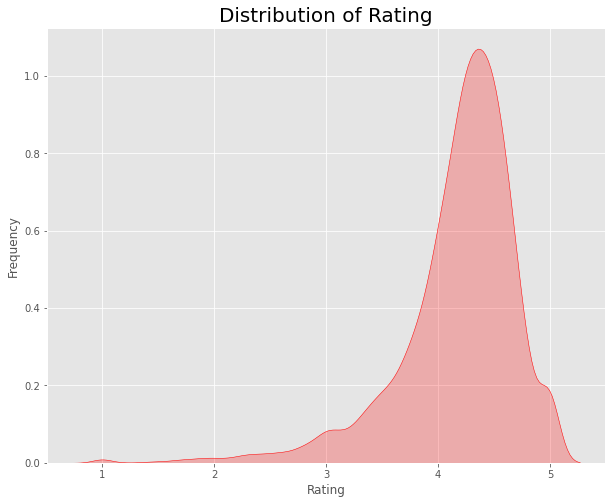

In [271]:
# Graph of Rating Distribution
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

* Average Rating of applications in google-store is around 4.3, therefore most of apps in store is getting good ratings from users.

In [272]:
len(data['Category'].unique())

33

Text(0.5, 1.0, 'Count of app in each category')

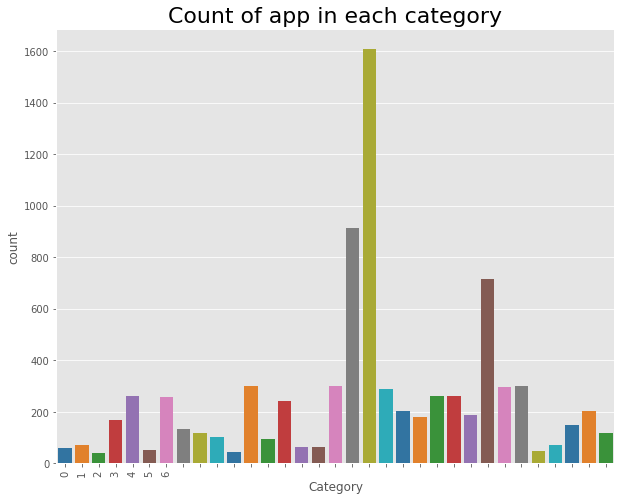

In [273]:
x = sns.countplot(x="Category",data=data, palette = "tab10")
x.set_xticklabels(g.get_xticklabels(), rotation=90)
x 
plt.title('Count of app in each category',size = 22)

*Games and Family Category have most number of apps in playstore.*

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

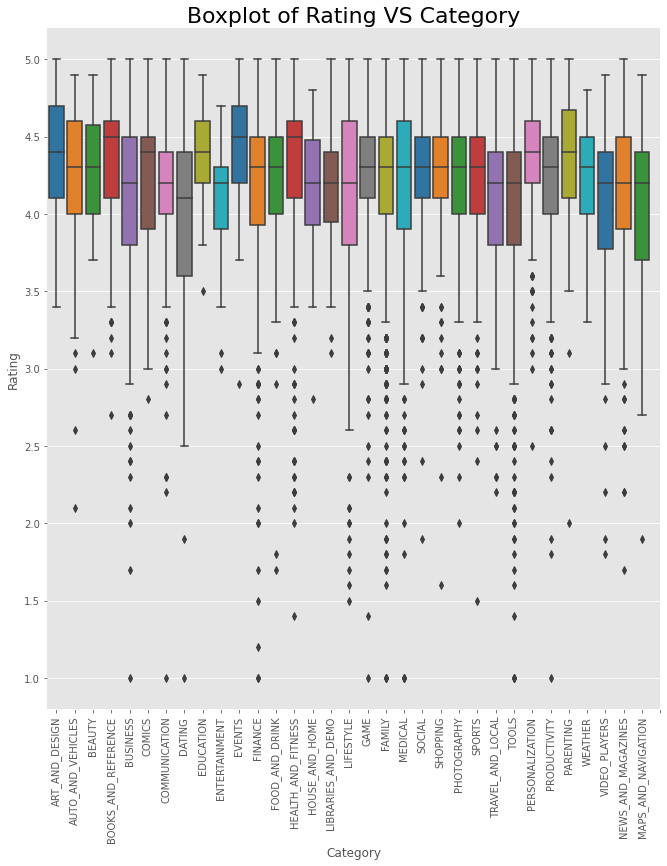

In [274]:
x = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "tab10")
x.despine(left=True)
x.set_xticklabels(rotation=90)
x.set( xticks=range(0,34))
x = x.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 22)

*There is not much variations in rating of apps across different categories of apps.*

In [275]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

Datatype is Object, we need to convert in integer.

In [276]:
# convert to int

data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Distribution of Reveiw')

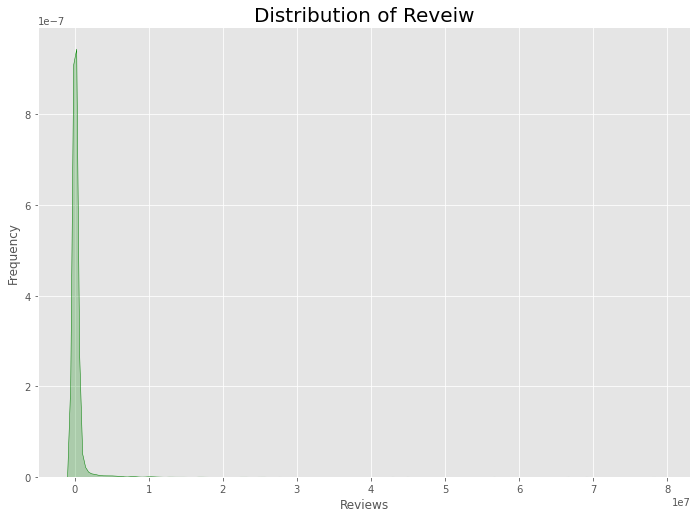

In [277]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 11.7
fig_size[1] = 8.27
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

In [278]:
data[data.Reviews > 5000000].shape

(82, 13)

*Most Number of Applications in this store have less than 1M in  reviews.*

Text(0.5, 1.0, 'Rating VS Reveiws')

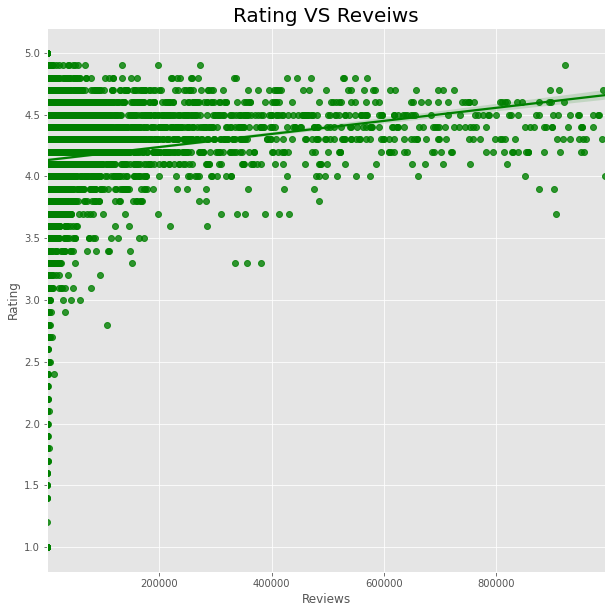

In [279]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating",color = "green",data=data[data['Reviews']<1000000])
plt.title('Rating VS Reveiws',size = 20)

*Apps with more reviews (Well-known) apps will get a good rating.*

In [280]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [281]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Data is still in object type and they contains symbols like "K" nad "M" at the end, and also special like "Varies with size", we need to remove it.

In [282]:
# Changing it to NA.
data['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [283]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [284]:
#Imputing Missing value with mean of size in each category.
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

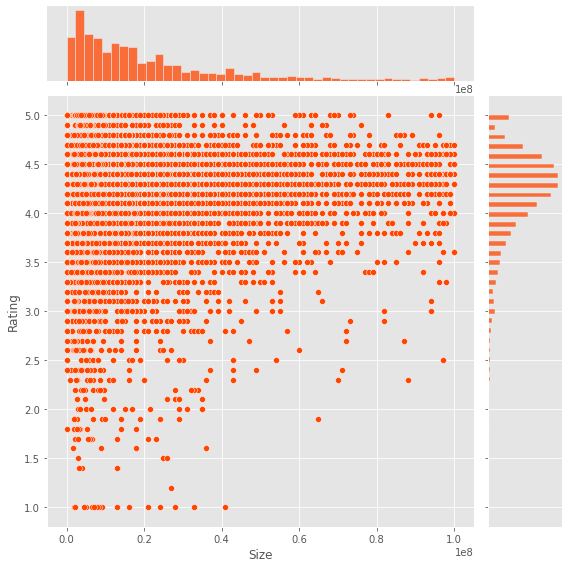

In [285]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, size = 8)

In [286]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Data is still in Object type and contain plus sign at the end.

In [287]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [288]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [289]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

Text(0.5, 1.0, 'Rating VS Installs')

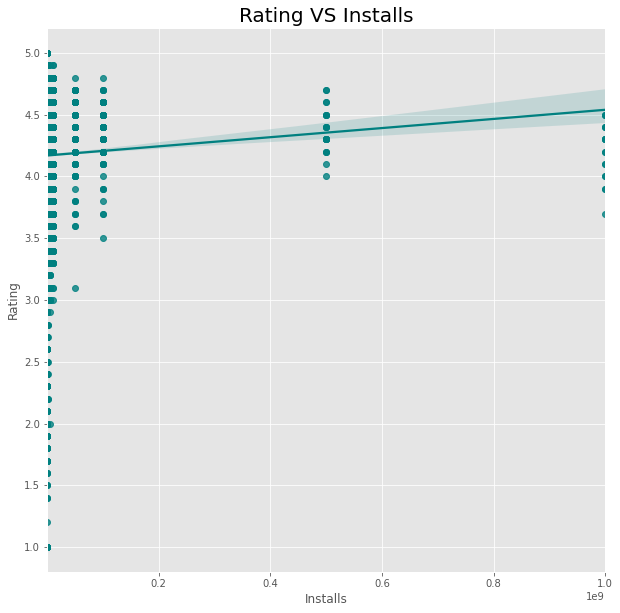

In [290]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

*Looks like number of Installs affect the ratings*

In [291]:
data['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [292]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Data is in Object type and in format of dollar-sign.

In [293]:
data['Price'].value_counts().head(30)

0          7588
$2.99       109
$0.99       103
$4.99        68
$1.99        59
$3.99        52
$1.49        30
$2.49        20
$9.99        14
$5.99        14
$6.99        11
$399.99      11
$4.49         9
$14.99        8
$7.99         7
$3.49         7
$8.99         4
$12.99        4
$19.99        4
$29.99        4
$11.99        3
$10.99        2
$16.99        2
$5.49         2
$7.49         2
$10.00        2
$1.00         2
$1.70         2
$17.99        2
$24.99        2
Name: Price, dtype: int64

In [294]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [295]:
data['Price'].describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average of Price is around 0.96, but most of apps are free and the most expensive apps costs around 400 Dollar.

In [296]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [297]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [298]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [299]:
#Dropping the unrated row
data = data[data['Content Rating'] != 'Unrated']

In [300]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [301]:
data.Genres.value_counts().head(10)

Tools              715
Entertainment      471
Education          429
Finance            302
Productivity       301
Lifestyle          300
Personalization    296
Action             292
Medical            290
Sports             266
Name: Genres, dtype: int64

In [302]:
data.Genres.value_counts().tail(10)

Strategy;Creativity                    1
Adventure;Education                    1
Parenting;Brain Games                  1
Health & Fitness;Action & Adventure    1
Lifestyle;Pretend Play                 1
Arcade;Pretend Play                    1
Casual;Music & Video                   1
Art & Design;Pretend Play              1
Lifestyle;Education                    1
Video Players & Editors;Creativity     1
Name: Genres, dtype: int64

In [303]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

It is in String Format,therefore we need to chnage it into datetime format.

In [304]:
data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    8189
unique                   1298
top       2018-08-03 00:00:00
freq                      245
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [305]:
data['new'].max() 

Timestamp('2018-08-08 00:00:00')

In [306]:
data['new'][0] -  data['new'].max()

Timedelta('-213 days +00:00:00')

In [307]:
data['lastupdate'] = (data['new'] -  data['new'].max()).dt.days
data['lastupdate'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

> End of the Analysis.

########################################################################################################################################################################################################################################################################################################################################################################################################################

#Mini Project-Model Building, Training and Evaluation
>By Rupesh Patel

This notebook is an assignment of CST2105_300 DataScience Foundation of BISI.

*The CSV file named "googleplaystore" is already loaded in the Data-Analysis part of assignment*

*Since, There is no feedback for data-analysis part. My data-analysis part is perfect.Therefore, I'm moving ahead with Feature preparation part*

### Feature Preparation 

In [308]:
#Checking cleaned data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,-49


In [309]:
data.describe()

,Rating,Reviews,Size,Installs,Price,lastupdate
count,8189.000000,8.189000e+03,8.189000e+03,8.189000e+03,8189.000000,8189.000000
mean,4.173330,2.554665e+05,2.136503e+07,9.172727e+06,1.038469,-275.375259
std,0.536724,1.986429e+06,2.133146e+07,5.827517e+07,16.865066,410.453620
min,1.000000,1.000000e+00,8.500000e+00,1.000000e+00,0.000000,-3001.000000
25%,4.000000,1.260000e+02,5.800000e+06,1.000000e+04,0.000000,-356.000000
50%,4.300000,3.014000e+03,1.415746e+07,1.000000e+05,0.000000,-80.000000
75%,4.500000,4.393500e+04,2.897678e+07,1.000000e+06,0.000000,-20.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,0.000000


In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8189 non-null   object        
 1   Category        8189 non-null   object        
 2   Rating          8189 non-null   float64       
 3   Reviews         8189 non-null   int64         
 4   Size            8189 non-null   float64       
 5   Installs        8189 non-null   int64         
 6   Type            8189 non-null   object        
 7   Price           8189 non-null   float64       
 8   Content Rating  8189 non-null   object        
 9   Genres          8189 non-null   object        
 10  Last Updated    8189 non-null   object        
 11  Current Ver     8189 non-null   object        
 12  Android Ver     8189 non-null   object        
 13  new             8189 non-null   datetime64[ns]
 14  lastupdate      8189 non-null   int64         
dtypes: 

**I would like to set my target variable (y) to "Rating". In doing so, I would like to build the model to predict "App ratings" by using other variables (x).**

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

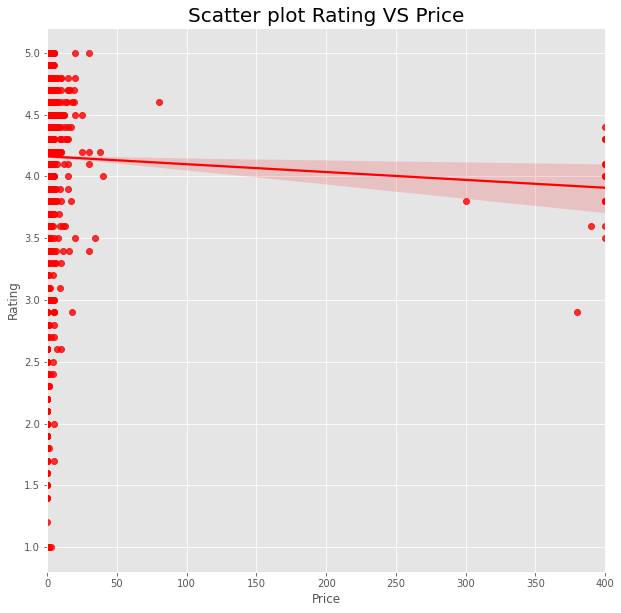

In [311]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'red',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

*If the price of app is rising then customers tend to give them bad reviews.*

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

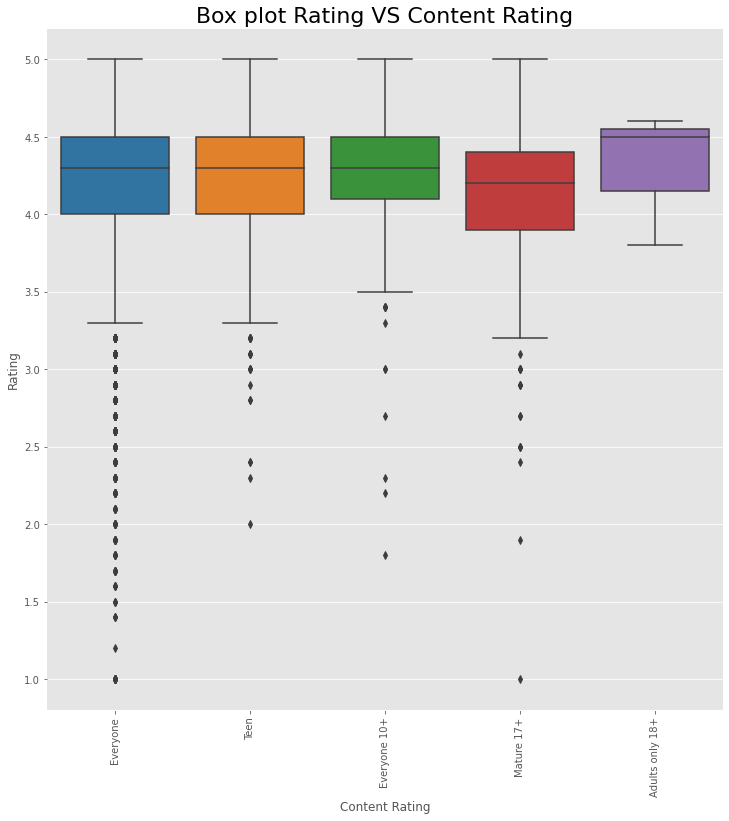

In [312]:
x = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "tab10")
x.despine(left=True)
x.set_xticklabels(rotation=90)
x = x.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 22)

*Content Rating not affect too much to Rating,but in Mature applications ,look like they get lower rating than other.*

Text(0.5, 1.0, 'Rating  VS Last Update( days ago )')

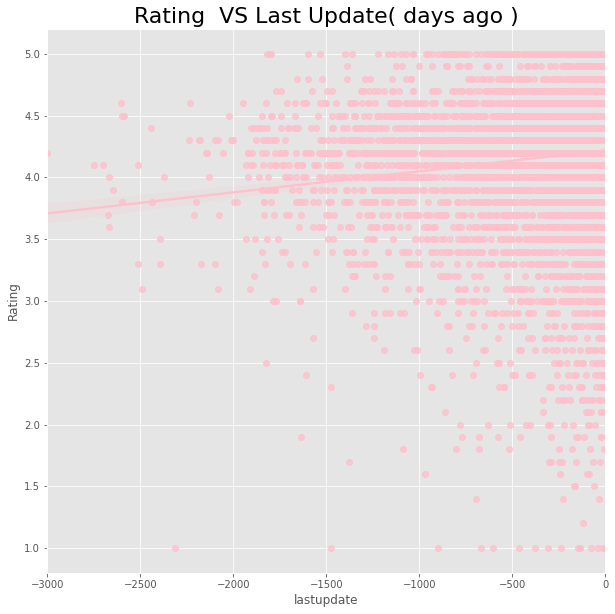

In [313]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'pink',data=data );
plt.title('Rating  VS Last Update( days ago )',size = 22)

If the app is updated, then users tend to give it good rating.

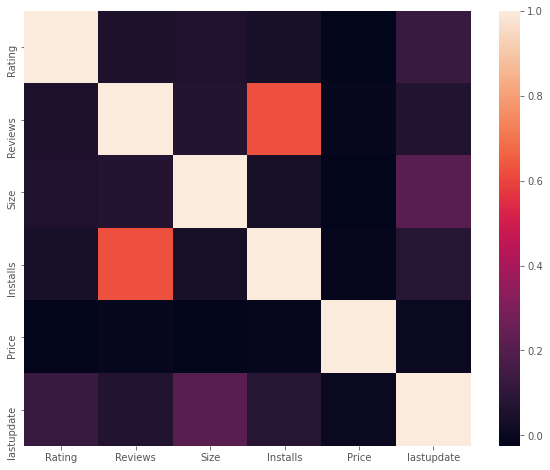

In [314]:
plt.figure(figsize=(10,8));
sns.heatmap(data.corr());
#sns.heatmap(data.corr(),annot=True)

**From heatmap,we can see the correlations between different numerical variables. Since, Target variable (y) Rating is mildly correlated with Reviews,size,Installs,lastupdate variables; I would like to keep them to build model.I would drop other variables which are not correlated with ratings of app.**

In [315]:
# One-hot encoding of categorical features
data = pd.concat([data,pd.get_dummies(data['Category'], prefix='Category',drop_first=True)],axis=1)
data = pd.concat([data,pd.get_dummies(data['Type'], prefix='Type ',drop_first=True)],axis=1)
data = pd.concat([data,pd.get_dummies(data['Content Rating'], prefix='Content Rating',drop_first=True)],axis=1)


In [316]:
data.drop(['Category','Type','Content Rating','App','Price','Genres','Last Updated','Current Ver','Android Ver','new'], axis=1,inplace=True)

##Arrange data into Features Matrix and Target Vector

###X =  Category,Reviews,Size,Installs,Type,Content Rating,lastupdate  (Features Matrix)
###y = Rating          (Target Vector)

In [317]:
##Arrange data into Features Matrix and Target Vector

###X =  Category,Reviews,Size,Installs,Type,Content Rating,lastupdate  (Features Matrix)
###y = Rating          (Target Vector)

In [351]:
X = data.loc[:,data.columns != 'Rating'].values
y = data.loc[:,'Rating'].values

## Split the dataset into Training set and Test set.
 

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0,shuffle = True)

## Applying Random Forest Regression Model

In [383]:
# Import RandomForestRegressor library from scikit learn
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Create an instance of the class RandomForestRegressor, This instance or object will create the RandomForest Regression Model
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

# Now, the model has been created. Next step is to train it. To do so, we need to call the method fit on our mode
regressor.fit(X_train, y_train)

#predicting lables for test-set
y_pred = regressor.predict(X_test)

# Error Values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3575946275946276
Mean Squared Error: 0.26576245421245426
Root Mean Squared Error: 0.5155215361286609


In [384]:
#Accuracy of whole model
r_sq1 = regressor.score(X, y)
print('Accuracy of RandomForest regression model:', r_sq1)

Accuracy of RandomForest regression model: 0.7785363270552491


## Step 5 Evaluation

Let's compare the predicted and actual values from the test set by using yellowbrick Regression evaluation techniques - Prediction Error plot.

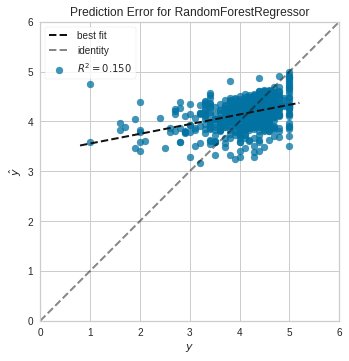

Coefficient is  0.15025655100517388


In [385]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
c_score = visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
print("Coefficient is ",c_score)

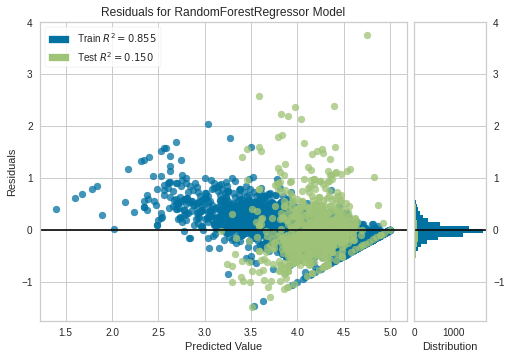

In [386]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor, hist=True)
#residual = y_pred - y_test
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

### Final Thoughts

- The model accuracy on training set is "85.5%", while the model accuracy on test set is only "15.0%". we can clearly say that model perform poorly on unseen test data.

- The accuracy on the training set is more, therefore model is clearly over-fitting on training data.

- we can reduce overfitting by dropping unimportant feature, with good feature engineering, or we can also use regularization technique.

- With this data, I did my best to select good features and also use onehotencoding for categorical variable.

- Since this dataset is made by web-scrapping, plus we can also see form data-analysis part is that; there is not much cor-relation between our target variable and other variables. Therefore, model is performing poorly.

- This dataset is great for doing Exploratory Data Analysis (EDA).

**This is the end of Project**

*Thank you very much,Carlos!*